In [225]:
#importamos pandas, la librería por excelencia para trabajar con data frames (tablas de datos)
import pandas as pd

In [226]:
#Leemos el archivo .csv y lo almacenamos en la memoria como df (data frame)
df = pd.read_csv('ingresos.csv')
#visualizamos el data frame
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [227]:
#revisamos si hay registros duplicados
df.drop_duplicates()
df.shape

(48842, 15)

Se ve que hay 48842 registros, por lo que no hay registros duplicados. Vamos a evaluar si podemos eliminar los registros con datos faltantes.

In [228]:
#renombraremos algunas columnas
df = df.rename(columns={'educational-num':'edunum','marital-status':'marital','capital-gain':'capitalg','capital-loss':'capitall','hours-per-week':'hpw','native-country':'nativec'})
#borramos los registros que tengan '?' en workclass. Parecen ser los mismos que en Ocupation. Y tambiém hay datos faltantes en native-Country alias 'nativec'
df = df.drop(df.query("workclass==['?']").index)
df = df.drop(df.query("nativec==['?']").index)
df.shape

(45232, 15)

borramos 3610 datos que corresponde al 7,4% del total. (En honor al tiempo aceptaremos este método)

Ahora realizaremos tablas de contingencia para cada variable. Al tener variables categóricas esta es la mejor forma de entender como afectan estas variables al ingreso.

In [229]:
#normalizamos la tabla para que en cada fila la suma de las dos columnas de 1 (100%), esto indica, para cada edad, que porcentaje esta por sobre y debajo de los 50k de ingreso. 
tablacontingencia = pd.crosstab(df.age, df.income, margins = True, normalize='index')
tablacontingencia.head(60)

income,<=50K,>50K
age,,
17,1.000000,0.000000
18,1.000000,0.000000
19,0.997685,0.002315
20,0.998911,0.001089
21,0.993583,0.006417
22,0.985493,0.014507
23,0.983092,0.016908
24,0.961947,0.038053
25,0.933804,0.066196


Se puede ver que los jovenes tienen mayor porcentaje de menores ingresos, a medida que son mayores va aumentando la proporción que recibe mayores ingresos, siendo el peak a los 53 años, luego va disminuyendo nuevamente para los mayores de 53.

In [230]:
tablacontingencia2 = pd.crosstab(df.workclass, df.income,normalize='index')
tablacontingencia2

income,<=50K,>50K
workclass,,
Federal-gov,0.609531,0.390469
Local-gov,0.704839,0.295161
Never-worked,1.000000,0.000000
Private,0.782298,0.217702
Self-emp-inc,0.445930,0.554070
Self-emp-not-inc,0.721022,0.278978
State-gov,0.732785,0.267215
Without-pay,0.904762,0.095238


Acá podemos notar que hay tipos de empleos que tienen mayor proporción de ingresos más altos, como los Self-emp-inc (Autoempleados) y quienes trabajan para el gobierno federal.

In [231]:
tablacontingencia3 = pd.crosstab(df.fnlwgt, df.income,normalize='index')
tablacontingencia3


income,<=50K,>50K
fnlwgt,,
13492,1.000000,0.000000
13769,0.666667,0.333333
14878,0.000000,1.000000
18827,1.000000,0.000000
19214,1.000000,0.000000
...,...,...
1268339,1.000000,0.000000
1366120,1.000000,0.000000
1455435,1.000000,0.000000


Esta es una columna que no sabemos que significa. Hay casi un valor distinto por cada registro y no se identifica un patrón


<AxesSubplot:xlabel='fnlwgt', ylabel='income'>

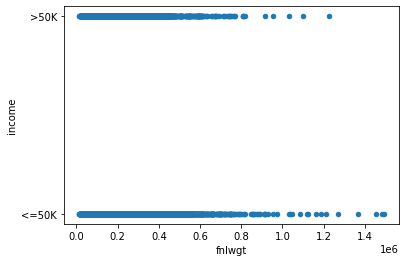

In [232]:
#realizamos un diagrama de disperción tomando el ingreso en el eje Y para ver si hay alguna relación
df.plot.scatter(x='fnlwgt',y='income')

No encontramos nada por lo que esta variable será descartada en la construcción del modelo

In [233]:
tablacontingencia4 = pd.crosstab(df.education, df.income,normalize='index')
tablacontingencia4


income,<=50K,>50K
education,,
10th,0.933061,0.066939
11th,0.945129,0.054871
12th,0.925477,0.074523
1st-4th,0.963964,0.036036
5th-6th,0.951002,0.048998
7th-8th,0.933252,0.066748
9th,0.943787,0.056213
Assoc-acdm,0.735899,0.264101
Assoc-voc,0.742726,0.257274


Prof-school, Doctorate y Masters son los grados con mejores ingresos

In [234]:
tablacontingencia5 = pd.crosstab(df.relationship, df.income,normalize='index')
tablacontingencia5

income,<=50K,>50K
relationship,,
Husband,0.544252,0.455748
Not-in-family,0.895070,0.104930
Other-relative,0.962963,0.037037
Own-child,0.984170,0.015830
Unmarried,0.936926,0.063074
Wife,0.514340,0.485660


Quienes están casados (Husband y Wife) son quienes en mayor proporción reciben ingresos sobre 50k

In [235]:
tablacontingencia6 = pd.crosstab(df.race, df.income,normalize='index')
tablacontingencia6

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.878161,0.121839
Asian-Pac-Islander,0.716807,0.283193
Black,0.873789,0.126211
Other,0.872521,0.127479
White,0.737677,0.262323


In [236]:
tablacontingencia7 = pd.crosstab(df.gender, df.income,normalize='index')
tablacontingencia7

income,<=50K,>50K
gender,,
Female,0.886447,0.113553
Male,0.687594,0.312406


In [237]:
tablacontingencia8 = pd.crosstab(df.hpw, df.income,normalize='index')
tablacontingencia8

income,<=50K,>50K
hpw,,
1,0.833333,0.166667
2,0.875000,0.125000
3,0.942857,0.057143
4,0.895833,0.104167
5,0.866667,0.133333
...,...,...
95,0.500000,0.500000
96,0.888889,0.111111
97,0.500000,0.500000


In [238]:
#las ganancias de capital las vamos a agrupar entre quienes tienen ganancias (1) y quienes no tienen o no invierten (0)
df['capitalg'] = df['capitalg'].apply(lambda x: 0 if x==0 else 1)
tablacontingencia9 = pd.crosstab(df.capitalg, df.income,normalize='index')
tablacontingencia9

income,<=50K,>50K
capitalg,,
0,0.786859,0.213141
1,0.373351,0.626649


El resultado es contundente, tener ganancias de capital, sin importar el monto indica que con mayor probabilidad tienes ingresos superiores a 50k. Lo cual es de esperar, puesto que alguien con mayores ingresos tendra dinero disponible para invertir.

In [239]:
#realizaremos la misma transformación para las pérdidas de capital
df['capitall'] = df['capitall'].apply(lambda x: 0 if x==0 else 1)
tablacontingencia10 = pd.crosstab(df.capitall, df.income,normalize='index')
tablacontingencia10

income,<=50K,>50K
capitall,,
0,0.765386,0.234614
1,0.486916,0.513084


Lo mismo ocurre cuando son pérdidas de capital, lo que revela las pérdidas es que se trata de gente que esta invirtiendo.

In [240]:
tablacontingencia11 = pd.crosstab(df.nativec, df.income,normalize='index')
tablacontingencia11

income,<=50K,>50K
nativec,,
Cambodia,0.653846,0.346154
Canada,0.631902,0.368098
China,0.681416,0.318584
Columbia,0.951220,0.048780
Cuba,0.744361,0.255639
Dominican-Republic,0.948454,0.051546
Ecuador,0.860465,0.139535
El-Salvador,0.925170,0.074830
England,0.605042,0.394958


Se puede ver también que hay importantes diferencias dependiendo del pais de origen.


Vamos a estudiar las correlaciones de las variables numericas. Para eso primero tenemos que transformar nuestra variable objetivo.

In [241]:
df['income'] = df['income'].apply(lambda x: 0 if x=='<=50K' else 1)

<AxesSubplot:>

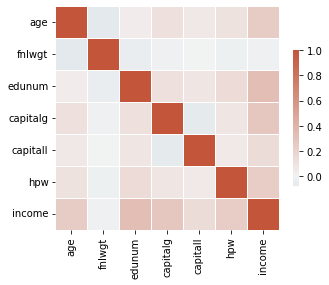

In [242]:
#Usamos matplot y seaborn graficar la matriz de correlaciones usando un mapa de calor. 
#Es decir, que en vez de valores visualizaremos colores.
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se aprecia que no hay correlaciones relevantes entre las variables numericas. Sin embargo se puede apreciar en las tablas de contingencia que hay relaciones no lineales. Por ejemplo en edad, las personas entre 45 y 55 años son quienes tienen mayor proporción de personas recibiendo más de 50k en ingresos. Para personas más jovenes y también mayores de 55 esa proporción cae. Por este motivo, y también por tener una importante cantidad de datos categóricos utilizaremos redes neuronales, puesto que permite trabajar con variables de distinta naturaleza y permite entender comportamiento no lineales en las variables.

In [243]:
#importamos el metodo train_test_split, lo que nos permite dividi los datos en una muestra de entrenamiento (train) y otra de testeo (test)
from sklearn.model_selection import train_test_split

Necesitamos transformar nuestras variables categoricas en variables dummies de 0 o 1. Para eso el metodo get_dummies nos facilita el trabajo creando nuevas columnas (variables) para cada valor posible de nuestras variables categoricas.

In [244]:
# X será el conjunto de variables independientes, mientras que y será la variable que queremos predecir
X = pd.get_dummies(df.drop(['fnlwgt', 'income'], axis=1))
y = df['income']
#dividimos los datos en 80% de la base para entrenamiento y 20% para las pruebas posteriores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [245]:
#Importamos tensorflow y keras, las bibliotecas que utilizaremos para crear, entrenar y testear nuestra red neuronal. 
#También importamos accuracy_score un metodo que nos permitira calcular facilmente el rendimiento de nuestro modelo.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

Crearemos un modelo con dos capas ocultas. La primera con 32 neuronas (o nodos) y la segunda con 64. 
La última capa es la salida donde necesitamos un "output" la variable que queremos predecir
Utilizamos la función de activación 'relu' que toma el valor 0 para los x negativos y x cuando x es positivo.
para la capa de salida aplicamos la función 'sigmoid'.

La elección de estos parametros fue arbitraria, se podría correr varias veces el modelo con distintos parametros hasta encontrar el de mejor rendimiento

In [246]:
#Crear modelo secuencial
model = Sequential()

model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [247]:
#compilamos el modelo y fijamos parametros para el calculo de perdidas entre el los valores predichos y los reales. También el mecanismo de optimización sobre el cual se corrige el modelo.
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [248]:
#aca entrenamos el modelo para que vaya mejorando despues de cada iteración (epocas) y nos vaya reportando el rendimiento tras cada iteración.
model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_test,y_test))


Epoch 1/100
1131/1131 [==============================] - 6s 4ms/step - loss: 0.5404 - accuracy: 0.7532 - val_loss: 0.4914 - val_accuracy: 0.7544
Epoch 2/100
1131/1131 [==============================] - 4s 4ms/step - loss: 0.4860 - accuracy: 0.7651 - val_loss: 0.4521 - val_accuracy: 0.7799
Epoch 3/100
1131/1131 [==============================] - 4s 4ms/step - loss: 0.4578 - accuracy: 0.7770 - val_loss: 0.4290 - val_accuracy: 0.7696
Epoch 4/100
1131/1131 [==============================] - 4s 4ms/step - loss: 0.4353 - accuracy: 0.7880 - val_loss: 0.4129 - val_accuracy: 0.8056
Epoch 5/100
1131/1131 [==============================] - 4s 4ms/step - loss: 0.4242 - accuracy: 0.7952 - val_loss: 0.3946 - val_accuracy: 0.8165
Epoch 6/100
1131/1131 [==============================] - 4s 4ms/step - loss: 0.4166 - accuracy: 0.7996 - val_loss: 0.3962 - val_accuracy: 0.8193
Epoch 7/100
1131/1131 [==============================] - 5s 4ms/step - loss: 0.4036 - accuracy: 0.8040 - val_loss: 0.3763 - val_ac

In [249]:
#realizamos predicciones de Y con el modelo entrenado usando los X (variables independientes) de testeo
y_pred = model.predict(X_test)
#dado que el modelo nos entrega un valor continuo entre 0 y 1 vamos a aproximar esos valores para compararlos con los y_test
y_pred = [0 if val < 0.5 else 1 for val in y_pred]

283/283 [==============================] - 1s 2ms/step


In [250]:
#Calculamos la eficacia del modelo comparando los Y reales de la muestra de testeo versus los Y predichos por el modelo
accuracy_score(y_test, y_pred)

0.8397258759809881

El modelo da un rendimiento de 84%, es decir de cada 100 acierta 84 veces en determinar si el ingreso de una persona es superior o inferior a 50k. Es un rendimiento aceptable. Con más tiempo se podría interar en el proceso para ver si (1) es necesario transformar alguna variables (2) probar incluir la variable que descartamos (3) cambiar algunos parametros de la red neuronal (4) entrenar el modelo con más epocas pudiese elevar el rendimiento.

¡Muchas Gracias por su Atención!